In [1]:
#Load Data
import pandas as pd
import numpy as np
from Utilities import *
msiDataCube = np.load('MsiDataCube.npy')
heMask=np.load('HeMask.npy')
heImage =np.load('HeImage.npy')

(-0.5, 7699.5, 7899.5, -0.5)

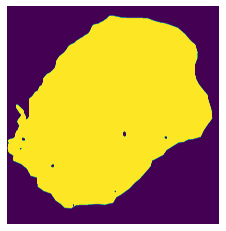

In [2]:
#plot tissue mask of the H&E image

import matplotlib.pyplot as plt
plt.imshow(heMask)
plt.axis('off')

(-0.5, 7699.5, 7899.5, -0.5)

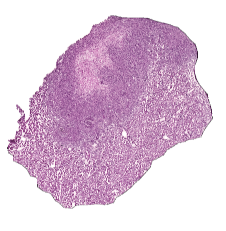

In [3]:
#plot the H&E image
plt.imshow(heImage)
plt.axis('off')

In [4]:
# generate a tissue mask for the tiles, a tile is assigned as tissue if more than 95% of 
# its pixels are labelled as tissue by the original heMask. A list that stores the position
# of each tissue tile is also produced 

tileMask, tilePositions = TileTissueMask(heMask,tile_size=100,threshold =0.95)


In [5]:
# define the CNN network
# Here we are using 19 layer DenseNet201 and initialising it
# with pretrained imagenet weights

from tensorflow.keras.applications.densenet import DenseNet201

from tensorflow.keras.models import Model

baseModel =DenseNet201(weights='imagenet',include_top=True,pooling='avg')
model =Model(inputs=baseModel.input,outputs=baseModel.get_layer('conv5_block32_concat').output)   


In [ ]:
#Use the CNN network as feature extractor to cacluate a histomorphological feature (HF) spectrum
# for each tissue tile
HFDataMatrix=HistomorphologicalFeatureConstructor(model,
                                                                   heImage,tileMask,tile_size=100)

In [7]:
#load HF data cube
HFDataMatrix=np.load("221020_hmFeatureData.npy")

In [8]:
#MinMax normalize each histomorphological feature
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
HFDataMatrixScaled=scaler.fit_transform(
    HFDataMatrix)

In [9]:
#Construct the hyperspectral data cube for histomorphological feature data

%matplotlib inline
from matplotlib import cm
import seaborn as sns
tilePositionsNp = np.array(tilePositions)
HFDataCube=np.zeros((tileMask.shape[0],tileMask.shape[1],HFDataMatrixScaled.shape[1]))
for i in range(len(tilePositions)):
    HFDataCube[tilePositionsNp[i,0],tilePositionsNp[i,1]]=HFDataMatrixScaled[i]


/home/amax/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/amax/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


(-0.5, 76.5, 78.5, -0.5)

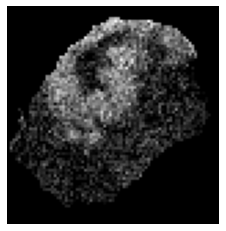

In [10]:
#the index of the component may be different 
NMFScoreMapOfHFData=GenerateNMFScoreMapFromDataMatrix(HFDataMatrixScaled,tilePositions,
                                      tileMask,idx_component=4)
plt.imshow(NMFScoreMapOfHFData,cm.gray) 
plt.axis('off')

In [11]:
#generate a tissue mask for MSI data by setting an threshold on total ion sum
totalIonSumMap=np.sum(msiDataCube,axis=2)
msiMask=(totalIonSumMap>9.4e2)*1
#generate a tissue MSI data matrix by reshaping the data cube

msiDataMatrix,  msiPositions= MsiDataCubeToDataMatrix(msiDataCube,msiMask)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
1 61
1 62
1 63
1 64
1 65
1 66
1 67
1 68
1 69
1 70
1 71
1 72
1 73
1 74
1 75
1 76
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
2 40
2 41
2 42
2 43
2 44
2 45
2 46
2 47
2 48
2 49
2 50
2 51


25 43
25 44
25 45
25 46
25 47
25 48
25 49
25 50
25 51
25 52
25 53
25 54
25 55
25 56
25 57
25 58
25 59
25 60
25 61
25 62
25 63
25 64
25 65
25 66
25 67
25 68
25 69
25 70
25 71
25 72
25 73
25 74
25 75
25 76
26 0
26 1
26 2
26 3
26 4
26 5
26 6
26 7
26 8
26 9
26 10
26 11
26 12
26 13
26 14
26 15
26 16
26 17
26 18
26 19
26 20
26 21
26 22
26 23
26 24
26 25
26 26
26 27
26 28
26 29
26 30
26 31
26 32
26 33
26 34
26 35
26 36
26 37
26 38
26 39
26 40
26 41
26 42
26 43
26 44
26 45
26 46
26 47
26 48
26 49
26 50
26 51
26 52
26 53
26 54
26 55
26 56
26 57
26 58
26 59
26 60
26 61
26 62
26 63
26 64
26 65
26 66
26 67
26 68
26 69
26 70
26 71
26 72
26 73
26 74
26 75
26 76
27 0
27 1
27 2
27 3
27 4
27 5
27 6
27 7
27 8
27 9
27 10
27 11
27 12
27 13
27 14
27 15
27 16
27 17
27 18
27 19
27 20
27 21
27 22
27 23
27 24
27 25
27 26
27 27
27 28
27 29
27 30
27 31
27 32
27 33
27 34
27 35
27 36
27 37
27 38
27 39
27 40
27 41
27 42
27 43
27 44
27 45
27 46
27 47
27 48
27 49
27 50
27 51
27 52
27 53
27 54
27 55
27 56
27 57
27 58


52 75
52 76
53 0
53 1
53 2
53 3
53 4
53 5
53 6
53 7
53 8
53 9
53 10
53 11
53 12
53 13
53 14
53 15
53 16
53 17
53 18
53 19
53 20
53 21
53 22
53 23
53 24
53 25
53 26
53 27
53 28
53 29
53 30
53 31
53 32
53 33
53 34
53 35
53 36
53 37
53 38
53 39
53 40
53 41
53 42
53 43
53 44
53 45
53 46
53 47
53 48
53 49
53 50
53 51
53 52
53 53
53 54
53 55
53 56
53 57
53 58
53 59
53 60
53 61
53 62
53 63
53 64
53 65
53 66
53 67
53 68
53 69
53 70
53 71
53 72
53 73
53 74
53 75
53 76
54 0
54 1
54 2
54 3
54 4
54 5
54 6
54 7
54 8
54 9
54 10
54 11
54 12
54 13
54 14
54 15
54 16
54 17
54 18
54 19
54 20
54 21
54 22
54 23
54 24
54 25
54 26
54 27
54 28
54 29
54 30
54 31
54 32
54 33
54 34
54 35
54 36
54 37
54 38
54 39
54 40
54 41
54 42
54 43
54 44
54 45
54 46
54 47
54 48
54 49
54 50
54 51
54 52
54 53
54 54
54 55
54 56
54 57
54 58
54 59
54 60
54 61
54 62
54 63
54 64
54 65
54 66
54 67
54 68
54 69
54 70
54 71
54 72
54 73
54 74
54 75
54 76
55 0
55 1
55 2
55 3
55 4
55 5
55 6
55 7
55 8
55 9
55 10
55 11
55 12
55 13
55 14
55 1

/home/amax/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/amax/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


(-0.5, 76.5, 78.5, -0.5)

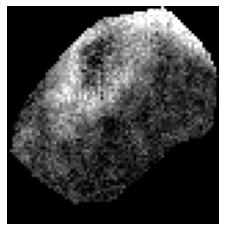

In [12]:
#the index of the component may be different 
NMFScoreMapOfMSIData=GenerateNMFScoreMapFromDataMatrix(msiDataMatrix,msiPositions,msiMask,6)
plt.imshow(NMFScoreMapOfMSIData,cm.gray,vmax=0.8) 
plt.axis('off')

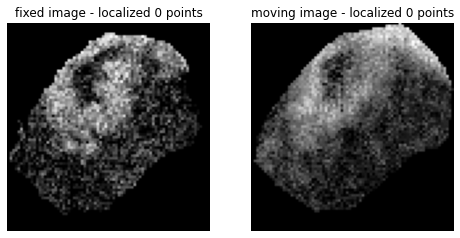

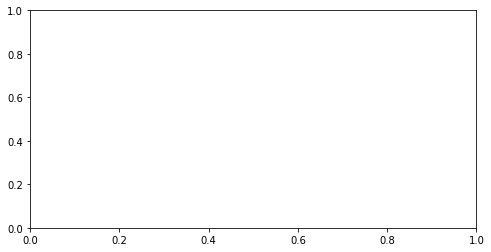

Final metric value: -0.23653335603332284
Optimizer's stopping condition, GradientDescentOptimizerv4Template: Convergence checker passed at iteration 32.


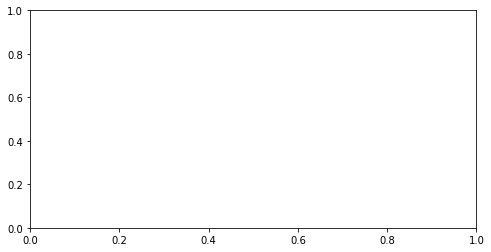


Optimizer's stopping condition, Already minimized


interactive(children=(IntSlider(value=0, description='image_z', max=1), FloatSlider(value=0.5, description='al…

In [13]:
#registration

from scipy import ndimage, misc
import cv2

fixed_np=NMFScoreMapOfHFData/np.mean(NMFScoreMapOfHFData)
moving_np=NMFScoreMapOfMSIData/np.mean(NMFScoreMapOfMSIData)
affine_transform,bspline_transform =Registration(fixed_np,moving_np,3e-4)



In [14]:
# use the affine and bspline transform to align the MSI data cube to
# the same space coordinate system of histomorphological feature data cube


msiDataCubeRegistered=[]

for i in range(msiDataCube.shape[2]):
    moving_image_temp = sitk.GetImageFromArray(msiDataCube[:,:,i],isVector=False)
    fixed_image=sitk.GetImageFromArray(fixed_np,isVector=False)
    moving_resampled_temp = sitk.Resample(moving_image_temp, fixed_image, affine_transform, sitk.sitkLinear, 0.0, moving_image_temp.GetPixelID())
    moving_resampled_temp_2 = sitk.Resample(moving_resampled_temp, fixed_image, bspline_transform, sitk.sitkLinear, 0.0, 
                                       moving_resampled_temp.GetPixelID())
    moving_np_resampled_temp = sitk.GetArrayFromImage(moving_resampled_temp_2)
    msiDataCubeRegistered.append(moving_np_resampled_temp)
msiDataCubeRegistered=np.moveaxis(np.array(msiDataCubeRegistered), 0, 2)

In [15]:
#generate a tissue mask for MSI data after registration
totalIonSumMapRegistered=np.sum(msiDataCubeRegistered,axis=2)
msiMaskRegistered=(totalIonSumMapRegistered>9.4e2)*1

In [16]:
#Only retain those pixels that are labeled as tissue by both the MSI data cube and
# the HF data cube.

msiDataMatrixMasked=[]
HFDataMatrixMasked=[]
positionsMasked=[]
for i in range(HFDataCube.shape[0]):
    for j in range(HFDataCube.shape[1]):
        if tileMask[i,j] and msiMaskRegistered[i,j]:
            print(i,j)
            positionsMasked.append([i,j])
            msiDataMatrixMasked.append(msiDataCubeRegistered[i,j])
            HFDataMatrixMasked.append(HFDataCube[i,j])
msiDataMatrixMasked=np.array(msiDataMatrixMasked)      
HFDataMatrixMasked=np.array(HFDataMatrixMasked)

positionsMasked=np.array(positionsMasked)

5 38
5 39
5 40
5 41
5 42
5 43
5 44
5 45
5 46
5 47
5 48
5 49
5 50
5 51
5 52
6 36
6 37
6 38
6 39
6 40
6 41
6 42
6 43
6 44
6 45
6 46
6 47
6 48
6 49
6 50
6 51
6 52
6 53
6 54
6 55
7 31
7 32
7 33
7 34
7 35
7 36
7 37
7 38
7 39
7 40
7 41
7 42
7 43
7 44
7 45
7 46
7 47
7 48
7 49
7 50
7 51
7 52
7 53
7 54
7 55
7 56
7 57
7 58
7 59
8 31
8 32
8 33
8 34
8 35
8 36
8 37
8 38
8 39
8 40
8 41
8 42
8 43
8 44
8 45
8 46
8 47
8 48
8 49
8 50
8 51
8 52
8 53
8 54
8 55
8 56
8 57
8 58
8 59
8 60
8 61
9 30
9 31
9 32
9 33
9 34
9 35
9 36
9 37
9 38
9 39
9 40
9 41
9 42
9 43
9 44
9 45
9 46
9 47
9 48
9 49
9 50
9 51
9 52
9 53
9 54
9 55
9 56
9 57
9 58
9 59
9 60
9 61
9 62
10 29
10 30
10 31
10 32
10 33
10 34
10 35
10 36
10 37
10 38
10 39
10 40
10 41
10 42
10 43
10 44
10 45
10 46
10 47
10 48
10 49
10 50
10 51
10 52
10 53
10 54
10 55
10 56
10 57
10 58
10 59
10 60
10 61
10 62
10 63
11 28
11 29
11 30
11 31
11 32
11 33
11 34
11 35
11 36
11 37
11 38
11 39
11 40
11 41
11 42
11 43
11 44
11 45
11 46
11 47
11 48
11 49
11 50
11 51
11 52


46 17
46 18
46 19
46 20
46 21
46 22
46 23
46 24
46 25
46 26
46 27
46 28
46 29
46 30
46 31
46 32
46 33
46 34
46 35
46 36
46 37
46 38
46 39
46 40
46 41
46 44
46 45
46 46
46 47
46 48
46 49
46 50
46 51
46 52
46 53
46 54
46 55
46 56
46 57
46 58
46 59
46 60
46 61
46 62
46 63
46 64
46 65
46 66
46 67
46 68
46 69
47 3
47 4
47 6
47 7
47 8
47 9
47 10
47 11
47 12
47 13
47 14
47 15
47 16
47 17
47 18
47 19
47 20
47 21
47 22
47 23
47 24
47 25
47 26
47 27
47 28
47 29
47 30
47 31
47 32
47 33
47 34
47 35
47 36
47 37
47 38
47 39
47 40
47 41
47 43
47 44
47 45
47 46
47 47
47 48
47 49
47 50
47 51
47 52
47 53
47 54
47 55
47 56
47 59
47 60
47 61
47 62
47 63
47 64
47 65
47 66
48 3
48 4
48 7
48 8
48 9
48 10
48 11
48 12
48 13
48 14
48 15
48 16
48 17
48 18
48 19
48 20
48 21
48 22
48 23
48 24
48 25
48 26
48 27
48 28
48 29
48 30
48 31
48 32
48 33
48 34
48 35
48 36
48 37
48 38
48 39
48 40
48 41
48 42
48 43
48 44
48 45
48 46
48 47
48 48
48 49
48 50
48 51
48 52
48 53
48 54
48 55
48 56
48 57
48 58
48 59
48 60
48 61
48 

In [17]:
#Spectral clustering analysis for MSI and Histomorphological Feature Data
from sklearn.cluster import SpectralClustering
clusteringMSI = SpectralClustering(n_clusters=3,affinity='cosine',n_components=5,
        assign_labels='kmeans',random_state=42).fit_predict(msiDataMatrixMasked)

clusteringHF= SpectralClustering(n_clusters=3,n_components=5,
                                      affinity='nearest_neighbors',
        assign_labels='kmeans',random_state=21).fit_predict(HFDataMatrixMasked)

In [18]:
#calculate the csk between MSI and HF clustering results and align the labels
cksValue,clusteringHF_algined=bestCks(clusteringMSI,clusteringHF,3)

(-1.4499999999999995, 74.44999999999999, 3.65, 77.35)

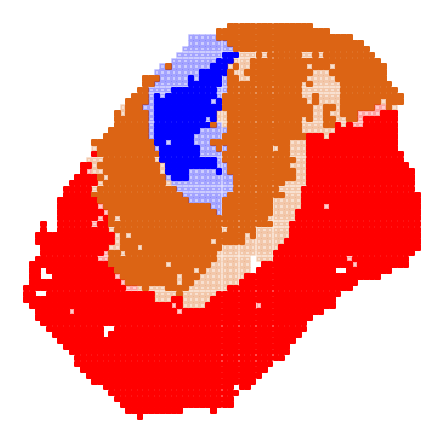

In [19]:
#plot the integrated segmentation map

confidenceList=(clusteringMSI==clusteringHF_algined)
transparencyList=[]
for i in confidenceList:
    if i:
        transparencyList.append(1)
    if not i:
        transparencyList.append(0.2)
        
color_list=[]
for i,j in enumerate(clusteringMSI):
    if j == 1:
        color_list.append([1,0,0,transparencyList[i]])
    if j == 0:
        color_list.append([220/255,100/255,20/255,transparencyList[i]])
    if j == 2:
        color_list.append([0,0,1,transparencyList[i]]) 
        
import seaborn as sns
%matplotlib inline
sns.set(style='white', context='poster', rc={'figure.figsize':
                                             ((msiMaskRegistered.shape[1]/10),
                                              (msiMaskRegistered.shape[0])/10)})
fig_p = plt.figure()
plt.scatter(positionsMasked[:,1],msiMaskRegistered.shape[0]-positionsMasked[:,0],c=color_list,marker='s',s=21)
plt.axis('off') 

In [20]:
cksValue

0.7372684617437205

In [21]:
#calculate CKS for different number of clusters.
cksList=[]
n_start=2
n_end=9
for m in range(n_start,n_end):
        print(m)
        cksList.append(cksCalculation(m,m,msiDataMatrixMasked,HFDataMatrixMasked))

2
3
4
5
6
7
8


In [22]:
print("The CKS values for number of clusters 2 o 8 are "+ str(cksList)+".")

The CKS values for number of clusters 2 o 8 are [0.5873567792882428, 0.7372684617437205, 0.5657382031596685, 0.3377637980654288, 0.26880809712619436, 0.22217527665322878, 0.2263217883883889].


In [23]:
tileMask.shape

(79, 77)

In [39]:
#Generate the map of ROIs and save its output.

mask_1=np.zeros([HFDataCube.shape[0],HFDataCube.shape[1]])
for i in range(len(positionsMasked)):
        mask_1[positionsMasked[i][0],positionsMasked[i][1]]=clusteringMSI[i]+1
        
mask_2=np.zeros([HFDataCube.shape[0],HFDataCube.shape[1]])
for i in range(len(positionsMasked)):
        mask_2[positionsMasked[i][0],positionsMasked[i][1]]=clusteringHF_algined[i]+1 

labelMapFinal= mask_1
for i in range(HFDataCube.shape[0]):
    for j in range(HFDataCube.shape[1]):
        if mask_1[i,j]!=mask_2[i,j]:
            labelMapFinal[i,j]=0

(-0.5, 76.5, 78.5, -0.5)

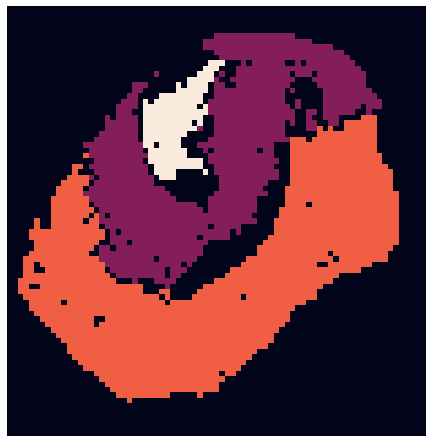

In [42]:
np.save('mapOfROIs',labelMapFinal)
plt.imshow(labelMapFinal)
plt.axis('off')       
      

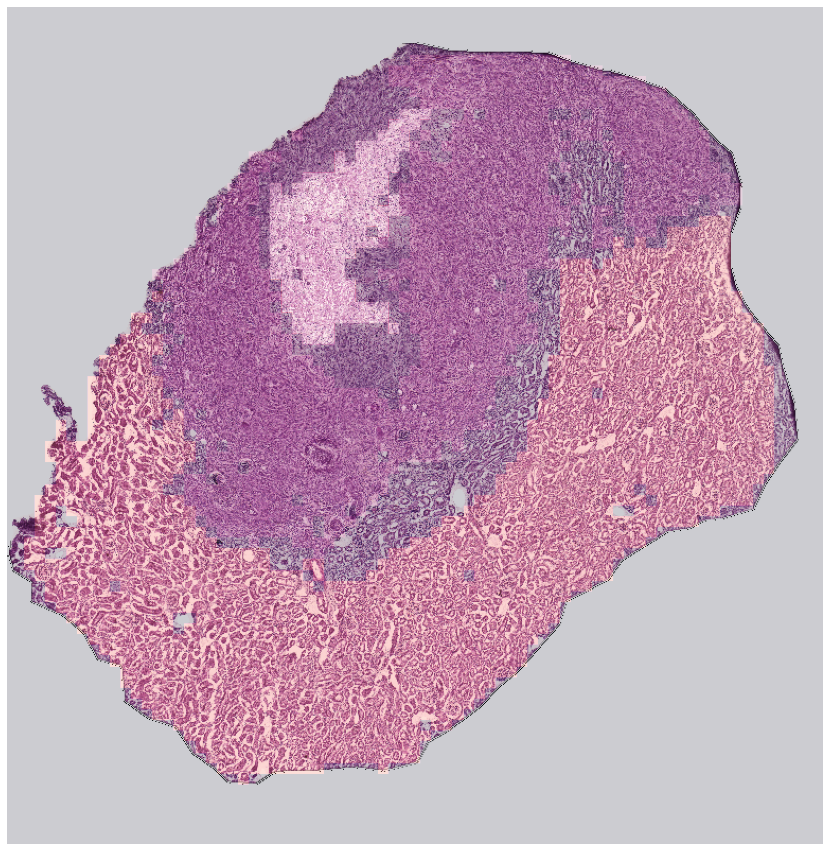

In [49]:
#overlap ROIs on the optical microscopy image
from scipy.ndimage.interpolation import zoom
heImag_downsampled_r=zoom(heImage[:,:,0],0.1)
heImag_downsampled_g=zoom(heImage[:,:,1],0.1)
heImag_downsampled_b=zoom(heImage[:,:,2],0.1)
heImag_downsampled=np.stack((heImag_downsampled_r,
                             heImag_downsampled_g,heImag_downsampled_b),axis=2)

labelMapFinal_upsampled=zoom(labelMapFinal,10,order=0)


import seaborn as sns
sns.set(style='white', context='poster', 
        rc={'figure.figsize':((labelMapFinal.shape[0]/5),(labelMapFinal.shape[1])/5)})

fig = plt.figure(frameon=False)

im2 = plt.imshow(heImag_downsampled, cmap=plt.cm.gray, vmax=5,alpha=1)
im1 = plt.imshow(labelMapFinal_upsampled,alpha=0.2)

plt.axis('off')
plt.show()